In [72]:
import imageio
import skimage.transform
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

In [30]:
gif_p = "gif/napari_pres_small.gif"
logo_p = "gif/logo.png"
intro_p = "gif/intro-slide.png"

In [175]:
frames = []
im = imageio.get_reader(gif_p)
for frame in im:
    frame = frame / 256.
    frames.append(frame)
    

In [176]:
intro_img = imageio.imread(intro_p)
intro_img = skimage.transform.resize(intro_img, frames[0].shape[:2])

In [177]:
# set fps
fps = 4
# set time to show intro slide in seconds
intro_t = 2

# append according number of frames to the frames array
frames = [intro_img for _ in range(fps*intro_t)] + frames

In [178]:
# merge intro imgs slowly in frames
frames[8] = frames[8]*0.25 + intro_img*0.75
frames[9] = frames[9]*0.5 + intro_img*0.5
frames[10] = frames[10]*0.75 + intro_img*0.25

In [179]:
# add logo to bottom corner
logo = imageio.imread(logo_p)

In [180]:
logo = skimage.transform.rescale(logo,0.02, order=0, multichannel=True)

In [181]:
l = logo.shape

In [182]:
s = frames[0].shape

In [183]:
for i in range(len(frames)):
    frames[i][s[0]-l[0]:,s[1]-l[1]:][logo[:,:,3]>0.4] = logo[logo[:,:,3]>0.4]

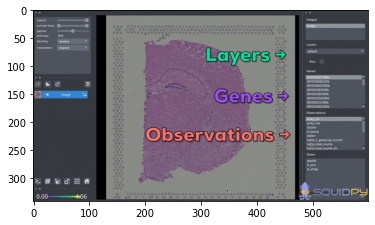

In [184]:
plt.imshow(frames[20])

In [185]:
# save out new gif
new_gif_p = "gif/napari_pres_small_edit.gif"
imageio.mimsave(new_gif_p,frames,fps=4)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [187]:
# write images as well
if not os.path.exists('gif/frames'):
    os.makedirs('gif/frames')
for i,frame in enumerate(frames):
    imageio.imwrite('gif/frames/frame_{:03}.png'.format(i), np.array(frame), format='PNG')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Use imagemagick to assemble gif `convert *.png -delay 25 napari.gif`